# Research question
The scope of this research is to solve HR-related problems in a multinational corporation, more precisely, to predict the employee promotion potential. The difficulty of the company is recognizing the right person for promotion and prepare them in time. The thing is that the company can announce the promotions only after conducting the evaluation of employees, which causes impediments in the transition of new positions. Consequently, the company lacks guidance in identifying suitable candidates at a particular checkpoint to facilitate the entire promotion period. This study examines the effects of age, education level, gender, department, number of average training scores, and awards won by an employee, recruitment channel on the probability of getting promoted. 


Please visit my github account for the data and codes. https://github.com/nurkyzbazarkulova/ML_Research_Proposal

# Data
Various data can be analyzed in this study. This study mainly focuses on the dataset "HR Analytics: Employee Promotion Data" available on Kaggle.com (https://www.kaggle.com/arashnic/hr-ana).

For doing the analysis, first, I install the necessary packages in R.

In [212]:
#libraries
library(corrplot)
library(GGally)
library(stargazer)
library(caTools)
library(AER)
library(dummies)
#install.packages("ROCR")
library(ROCR)
#install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
library(caret)
#install.packages('rpart')
library(rpart)
#install.packages('ROSE')
library(ROSE)
#install.packages('randomForest')
library(randomForest)

As a second step, I set the working directory to import the dataset.

In [2]:
#Create your own working directly to read the dataset.
setwd('C:/Users/Nurkyz/OneDrive/LMU/WiSe2020-2021/Machine Learning/Research proposal')

Read the dataset and start the data exploration. Data exploration helps to take a broader look at patterns, trends, summary, missing values in the current dataset.

In [178]:
#Read the data from the working directory.
data <- read.csv('C:/Users/Nurkyz/OneDrive/LMU/WiSe2020-2021/Machine Learning/Research proposal/Promotion_dataset.csv',header=TRUE,sep=",")

In [179]:
# display top 6 rows of dataset to see how data looks like
head(data)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won.,avg_training_score,is_promoted
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,0,49,0
2,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,60,0
3,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,50,0
4,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,50,0
5,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,73,0
6,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3,7,0,85,0


In [180]:
# display bottom 6 rows to see what data looks like
tail(data)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won.,avg_training_score,is_promoted
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
54803,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1,2,0,49,0
54804,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3,17,0,78,0
54805,74592,Operations,region_27,Master's & above,f,other,1,37,2,6,0,56,0
54806,13918,Analytics,region_1,Bachelor's,m,other,1,27,5,3,0,79,0
54807,13614,Sales & Marketing,region_9,,m,sourcing,1,29,1,2,0,45,0
54808,51526,HR,region_22,Bachelor's,m,other,1,27,1,5,0,49,0


Describe the data structure, and it displays the data type of each variable present in the data, like whether that particular variable is numeric, factor, etc.

In [181]:
# Get to know the structure of your dataset
str(data)

'data.frame':	54808 obs. of  13 variables:
 $ employee_id         : int  65438 65141 7513 2542 48945 58896 20379 16290 73202 28911 ...
 $ department          : Factor w/ 9 levels "Analytics","Finance",..: 8 5 8 8 9 1 5 5 1 8 ...
 $ region              : Factor w/ 34 levels "region_1","region_10",..: 32 15 11 16 19 12 13 28 13 1 ...
 $ education           : Factor w/ 4 levels "","Bachelor's",..: 4 2 2 2 2 2 2 4 2 4 ...
 $ gender              : Factor w/ 2 levels "f","m": 1 2 2 2 2 2 1 2 2 2 ...
 $ recruitment_channel : Factor w/ 3 levels "other","referred",..: 3 1 3 1 1 3 1 3 1 3 ...
 $ no_of_trainings     : int  1 1 1 2 1 2 1 1 1 1 ...
 $ age                 : int  35 30 34 39 45 31 31 33 28 32 ...
 $ previous_year_rating: num  5 5 3 1 3 3 3 3 4 5 ...
 $ length_of_service   : int  8 4 7 10 2 7 5 6 5 5 ...
 $ awards_won.         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : int  49 60 50 50 73 85 59 63 83 54 ...
 $ is_promoted         : int  0 0 0 0 0 0 0 0 0 0 ...


The dataset consists of 54808 observations and 13 variables:
* employee_id : unique id of each employee
<br><b>Independent variables:</b> </br>
* department: a categorical variable that indicates the department of the employee belongs. Consists of:
 - Sales & Marketing
 - Operations
 - Procurement
 - Technology
 - Analytics
 - Finance
 - Legal
 - HR
 - R&D
* region: a categorical variable indicating the region of employment with 34 different levels.
* education : a categorical variable indicating the education level of the employee:
- Bachelor's 
- Master's & above
* gender: gender of the employee 
 - Male
 - Female
* recruitment_channel: a categorical variable indicating the recruitment channel of an employee:
 - sourcing
 - referred
 - other
* no_of_trainings: an integer variable indicating the number of training completed in the previous year on soft skills, technical skills, and so on.
* age: an integer variable indicating the age of an employee
* previous_year_rating: a numerical variable indicating the rating of the employee for the previous year
* length_of_service: an numerical variable indicating the rating of the employee for the previous year
* awards_won: a binary variable equals one if an employee won the award during the last year, otherwise equals 0.
* avg_training_score: integer variable indicating the average score in current training evaluation
<br><b>Dependent variable:</b> </br>
<br><b> is_promoted </b></br> : a binary variable which equals one if the employee is recommended for a promotion, otherwise equals 0.

In [182]:
#display the column name of the data
names(data)

[1] "employee_id"          "department"           "region"              
 [4] "education"            "gender"               "recruitment_channel" 
 [7] "no_of_trainings"      "age"                  "previous_year_rating"
[10] "length_of_service"    "awards_won."          "avg_training_score"  
[13] "is_promoted"

In [183]:
#display the summary or descriptive statistics of the data
summary(data)

  employee_id                department          region     
 Min.   :    1   Sales & Marketing:16840   region_2 :12343  
 1st Qu.:19670   Operations       :11348   region_22: 6428  
 Median :39226   Procurement      : 7138   region_7 : 4843  
 Mean   :39196   Technology       : 7138   region_15: 2808  
 3rd Qu.:58731   Analytics        : 5352   region_13: 2648  
 Max.   :78298   Finance          : 2536   region_26: 2260  
                 (Other)          : 4456   (Other)  :23478  
            education     gender    recruitment_channel no_of_trainings 
                 : 2409   f:16312   other   :30446      Min.   : 1.000  
 Bachelor's      :36669   m:38496   referred: 1142      1st Qu.: 1.000  
 Below Secondary :  805             sourcing:23220      Median : 1.000  
 Master's & above:14925                                 Mean   : 1.253  
                                                        3rd Qu.: 1.000  
                                                        Max.   :10.000  
 

In [184]:
#Check the missing values
sum(is.na(data))

[1] 4124

In [185]:
# Remove the missing values present in the data
data <- data[complete.cases(data), ]

I have checked if there are any missing values in the dataset. The large missing values might affect the accuracy of my analysis. Since I have a large dataset, I can remove them from the dataset. In the small dataset, the missing values can be imputed by exploiting techniques like mean, K-nearest neighbor, and fuzzy K-means.

<br> In the further steps, I am converting the categorical dependent variable to a dummy variable and checking whether there is a correlation between my variables. </br>

In [186]:
#convert is_promoted to categorical
data$is_promoted <- as.factor(data$is_promoted)

In [187]:
#check if there is a correlation between the variables
cor(data[c("no_of_trainings", "age", "previous_year_rating", "length_of_service", "awards_won.", "avg_training_score")])

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won.,avg_training_score
no_of_trainings,1.000000000,-0.081542733,-0.063126473,-0.054220641,-0.008430295,0.04443301
age,-0.081542733,1.000000000,0.006008234,0.624249658,-0.010418627,-0.05674427
previous_year_rating,-0.063126473,0.006008234,1.000000000,0.000252746,0.027738155,0.07513911
length_of_service,-0.054220641,0.624249658,0.000252746,1.000000000,-0.043845624,-0.04226047
awards_won.,-0.008430295,-0.010418627,0.027738155,-0.043845624,1.000000000,0.07256739
avg_training_score,0.044433005,-0.056744271,0.075139112,-0.042260471,0.072567395,1.00000000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

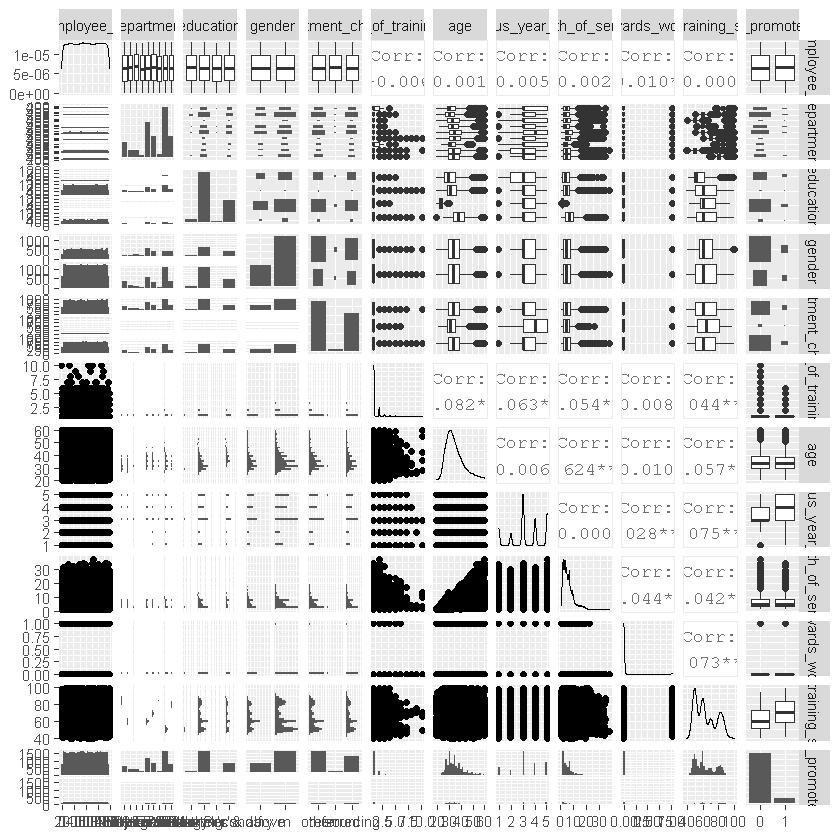

In [12]:
#plot the correlation matrix
#remove "region" variable as it is above the cardinality threshold
data$region <- NULL
ggpairs(data)

In [188]:
#convert to dummies
education <- dummy("education", data = data)
gender <- dummy("gender", data = data)
department <- dummy("department", data = data)
recruitment_channel <- dummy("recruitment_channel", data = data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

In [205]:
#bind
data_dummy <- cbind(data, gender)
data_dummy <- cbind(data_dummy, education)
data_dummy <- cbind(data_dummy, department)
data_dummy <- cbind(data_dummy, recruitment_channel)

In [206]:
#get to know the new column names in data_dummy
names(data_dummy)

[1] "employee_id"                 "department"                 
 [3] "region"                      "education"                  
 [5] "gender"                      "recruitment_channel"        
 [7] "no_of_trainings"             "age"                        
 [9] "previous_year_rating"        "length_of_service"          
[11] "awards_won."                 "avg_training_score"         
[13] "is_promoted"                 "genderf"                    
[15] "genderm"                     "education"                  
[17] "educationBachelor's"         "educationBelow Secondary"   
[19] "educationMaster's & above"   "departmentAnalytics"        
[21] "departmentFinance"           "departmentHR"               
[23] "departmentLegal"             "departmentOperations"       
[25] "departmentProcurement"       "departmentR&D"              
[27] "departmentSales & Marketing" "departmentTechnology"       
[29] "recruitment_channelother"    "recruitment_channelreferred"
[31] "recruitment_channelsourcing"

In [208]:
#rename the column names
colnames(data_dummy)[17] <- "education_Bachelor"
colnames(data_dummy)[19] <- "educationMaster_above"
colnames(data_dummy)[18] <- "educationBelow_Secondary"
colnames(data_dummy)[26] <- "department_RD"
colnames(data_dummy)[27] <- "department_SM"
colnames(data_dummy)[11] <- "awards_won"

In [221]:
# display top 6 rows of dataset "data_dummy" to see how data look like
head(data_dummy)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,departmentHR,departmentLegal,departmentOperations,departmentProcurement,department_RD,department_SM,departmentTechnology,recruitment_channelother,recruitment_channelreferred,recruitment_channelsourcing
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,...,0,0,0,0,0,1,0,0,0,1
2,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,...,0,0,1,0,0,0,0,1,0,0
3,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,...,0,0,0,0,0,1,0,0,0,1
4,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,...,0,0,0,0,0,1,0,1,0,0
5,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,...,0,0,0,0,0,0,1,1,0,0
6,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3,7,...,0,0,0,0,0,0,0,0,0,1


In [210]:
names(data_dummy)

[1] "employee_id"                 "department"                 
 [3] "region"                      "education"                  
 [5] "gender"                      "recruitment_channel"        
 [7] "no_of_trainings"             "age"                        
 [9] "previous_year_rating"        "length_of_service"          
[11] "awards_won"                  "avg_training_score"         
[13] "is_promoted"                 "genderf"                    
[15] "genderm"                     "education"                  
[17] "education_Bachelor"          "educationBelow_Secondary"   
[19] "educationMaster_above"       "departmentAnalytics"        
[21] "departmentFinance"           "departmentHR"               
[23] "departmentLegal"             "departmentOperations"       
[25] "departmentProcurement"       "department_RD"              
[27] "department_SM"               "departmentTechnology"       
[29] "recruitment_channelother"    "recruitment_channelreferred"
[31] "recruitment_channelsourcing"

# Building a model

In this section, I explain the models I use to predict the promotion of employees. Since the dependent variable is binary, I consider three concepts for prediction. They are the linear probability model (model_8), logit (model_logit_8), and probit (model_probit_8) models. Before running model_8, model_logit_8, model_probit_8, I have run nine different models for each type of model and chose the model_8, model_logit_8, model_probit_8 by dropping out the models with insignificant variables (e.g., recruitment_channel). As a reference category, I set genderf, educationBelow_Secondary, department_Analytics.

In [218]:
data_dummy$is_promoted = as.factor(data_dummy$is_promoted)
data_dummy$age <- as.numeric(data_dummy$age)
data_dummy$previous_year_rating <- as.numeric(data_dummy$previous_year_rating)
data_dummy$avg_training_score <- as.numeric(data_dummy$avg_training_score)
data_dummy$awards_won <- as.numeric(data_dummy$awards_won)

In [219]:
# reference categories: genderf, educationBelow_Secondary, department_Analytics

# run a linear model
model_8 <- lm(formula = is_promoted ~ age + previous_year_rating + awards_won + avg_training_score + 
              genderm + education_Bachelor + educationMaster_above + department_SM + departmentFinance + 
              departmentHR + departmentLegal + departmentOperations + departmentProcurement + department_RD + departmentTechnology,  
              data = data_dummy)


# run a binomial model (logit)
model_logit_8 <- glm(formula = is_promoted ~ age + previous_year_rating + awards_won + avg_training_score + 
                     genderm + education_Bachelor + educationMaster_above + department_SM + departmentFinance + 
                     departmentHR + departmentLegal + departmentOperations + departmentProcurement + department_RD + departmentTechnology,  
                     data = data_dummy, family = binomial(link = "logit"))


#run a binomial model (probit)
model_probit_8 <- glm(formula = is_promoted ~ age + previous_year_rating + awards_won + avg_training_score + 
                      genderm + education_Bachelor + educationMaster_above +department_SM + departmentFinance + 
                      departmentHR + departmentLegal + departmentOperations + departmentProcurement + department_RD +departmentTechnology,  
                      data = data_dummy, family = binomial(link = "probit"))


Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"

After reproducing the models' estimations, I store heteroskedasticity-robust standard errors of the coefficient estimators in a list that later are used as an argument in stargazer. Then, I present all the results of all three models in the table below.

In [222]:
#robust standart errors for models
#rob_se <- list(sqrt(diag(vcovHC(model_8, type = "HC1"))), 
#               sqrt(diag(vcovHC(model_logit_8, type = "HC1"))),
#               sqrt(diag(vcovHC(model_probit_8, type = "HC1"))))

In [223]:
stargazer(model_8, model_logit_8, model_probit_8,
          digits = 3,
          type = "text", 
          header = FALSE,
          se = rob_se,
          model.numbers = FALSE,
          column.labels = c("(1)", "(2)", "(3)"))


                            Dependent variable:       
                      --------------------------------
                                is_promoted           
                        OLS     logistic     probit   
                        (1)        (2)         (3)    
------------------------------------------------------
age                    -0.001   -0.022***   -0.011*** 
                      (0.003)    (0.003)     (0.001)  
                                                      
previous_year_rating   0.030*   0.521***    0.260***  
                      (0.017)    (0.017)     (0.008)  
                                                      
awards_won            0.227***  1.819***    0.993***  
                      (0.081)    (0.081)     (0.043)  
                                                      
avg_training_score    0.023***  0.257***    0.126***  
                      (0.005)    (0.005)     (0.003)  
                                                      
genderm  

In this table, models (1), (2), (3) are baseline specifications. These models differ only in the way they model the promotion probability. Model (1) is a linear probability model, model(2) is a Logit regression, and model (3) uses the Probit approach.

In the linear model (1), the coefficients have direct interpretation. An increase in the previous_year_rating by 1 unit is estimated to increase the probability of getting promoted by about 0.030 percentage points. Also, awards won in the past addition the likelihood of promotion by 0.227 percentage points. We can see from the table that is at Sales and Marketing department than in the department of Analytics increases the chances of getting promoted by 0.785 percentage points. In this linear model, all coefficients except age, gender, education are significant at a 1 % level.

Models (2) and (3) provide similar estimations, and all coefficients are large and significant at a 1 % level. These models differ so that the Logit regression (2) coefficients are more significant than in the probit model. Since the Akaike test value is also smaller than for the probit model, I will proceed with Logit Regression in further steps.


In [117]:
#summary of the logit model
summary(model_logit_8)


Call:
glm(formula = is_promoted ~ age + previous_year_rating + awards_won + 
    avg_training_score + genderm + education_Bachelor + educationMaster_above + 
    department_SM + departmentFinance + departmentHR + departmentLegal + 
    departmentOperations + departmentProcurement + department_RD + 
    departmentTechnology, family = binomial(link = "logit"), 
    data = data_dummy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7459  -0.3951  -0.2756  -0.1828   3.3953  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -26.032425   0.443633 -58.680  < 2e-16 ***
age                    -0.021967   0.002842  -7.728 1.09e-14 ***
previous_year_rating    0.521132   0.017138  30.408  < 2e-16 ***
awards_won              1.818955   0.082756  21.980  < 2e-16 ***
avg_training_score      0.257336   0.004810  53.497  < 2e-16 ***
genderm                -0.034614   0.041569  -0.833  0.40501    
education_Bachelor      0.4416

In [121]:
#In the next step, I am conducting the Variance Inflation Test. This test assists to identify the multicollinearity between the independent variables in the data. VIF values higher than 5 to 10 exhibit that there is multicollinearity. Hence, the variables having high multicollinearity must be dropped from the model, because there will be no impact in the accuracy of the model.

In [122]:
#Variance Inflation Factor
#vif(model_logit_8)

In [123]:
#Variables avg_training score, education_Bachelor, educationMaster_above, department_SM, department_Operations have high VIF values and they should be dropped out from the model. However, I will leave 

In this step, I do a correlation test between variables.

In [124]:
#check if there is a correlation between the variables
#cor(data_dummy[c("department_SM", "departmentFinance", "departmentHR", "departmentLegal",
                 #"departmentOperations", "departmentProcurement", "department_RD", "departmentTechnology", "departmentAnalytics")])

,department_SM,departmentFinance,departmentHR,departmentLegal,departmentOperations,departmentProcurement,department_RD,departmentTechnology,departmentAnalytics
department_SM,1.00000000,-0.14334979,-0.14063179,-0.08788524,-0.34503830,-0.25959969,-0.08996696,-0.25698448,-0.21708593
departmentFinance,-0.14334979,1.00000000,-0.04563775,-0.02852047,-0.11197163,-0.08424514,-0.02919603,-0.08339645,-0.07044860
departmentHR,-0.14063179,-0.04563775,1.00000000,-0.02797970,-0.10984858,-0.08264780,-0.02864245,-0.08181520,-0.06911285
departmentLegal,-0.08788524,-0.02852047,-0.02797970,1.00000000,-0.06864783,-0.05164921,-0.01789957,-0.05112890,-0.04319080
departmentOperations,-0.34503830,-0.11197163,-0.10984858,-0.06864783,1.00000000,-0.20277531,-0.07027389,-0.20073255,-0.16956749
departmentProcurement,-0.25959969,-0.08424514,-0.08264780,-0.05164921,-0.20277531,1.00000000,-0.05287262,-0.15102703,-0.12757907
department_RD,-0.08996696,-0.02919603,-0.02864245,-0.01789957,-0.07027389,-0.05287262,1.00000000,-0.05233998,-0.04421385
departmentTechnology,-0.25698448,-0.08339645,-0.08181520,-0.05112890,-0.20073255,-0.15102703,-0.05233998,1.00000000,-0.12629384
departmentAnalytics,-0.21708593,-0.07044860,-0.06911285,-0.04319080,-0.16956749,-0.12757907,-0.04421385,-0.12629384,1.00000000


In [170]:
X <- data_dummy[c("department_SM", "departmentFinance", "departmentHR", "departmentLegal",
                 "departmentOperations", "departmentProcurement", "department_RD", "departmentTechnology", "departmentAnalytics")]

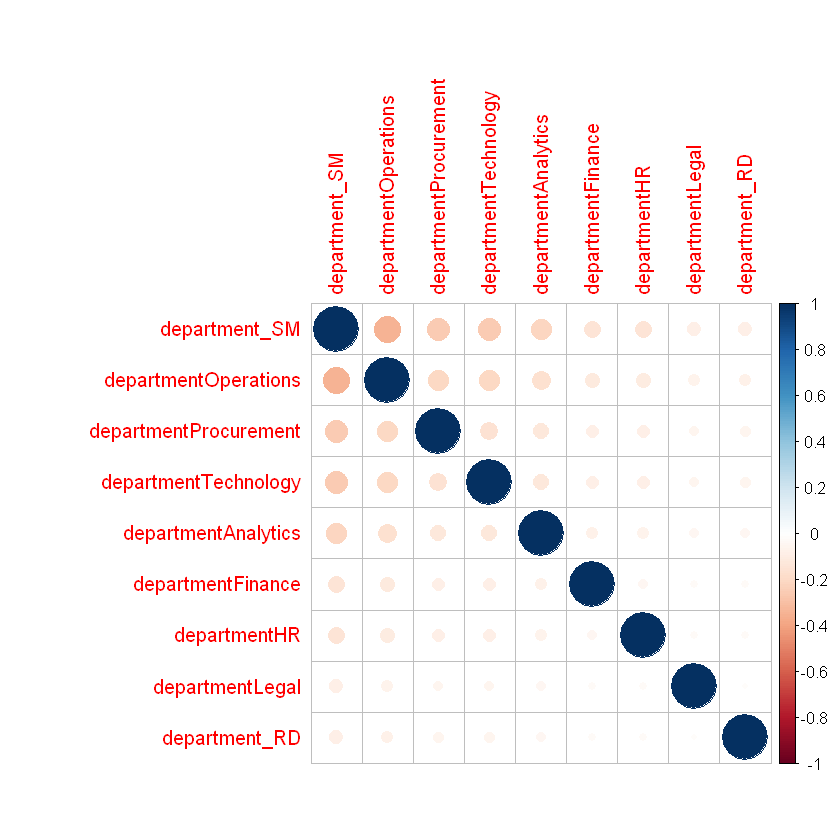

In [171]:
corrplot(cor(X), order = "hclust")


In [ ]:
# Potential problems of multicollinearity: vif values are high for education and department (especially for Operations, Sales & Management, Analytics)

In [125]:
#How many promoted and not promoted
table(data_dummy$is_promoted)


    0     1 
46355  4329 

In this step, I wanted to see how many employees are promoted (46355) and how many are not promoted (4329). We can see that no promotion is a more common outcome than the promotion. I would like to see the predict how many employees are promoted. For doing so, I do the following division 4329/(46355+4329 ), and the result presents that the ratio of promotion is about 8,5 percent.

In [27]:
#ratio of getting promotion (about 8,5 percent)
4329/(46355+4329 )

[1] 0.08541157

Here, I randomly split the dataset into training and testing sets. I put 75 % of the data in the training set, which I will use to build the model, and 25 % in the testing set to test my model. The split function randomly splits the data. Moreover, it makes sure that the outcome variable is well-balanced in each piece. By randomly splitting the data, I will be able to measure out-of-sample accuracy. There is a TRUE and FALSE for value for each of the observations. TRUE means that I must put it into the training set and FALSE implies that I should put it into the testing set. The subset function helps me to create these Train and Test sets.

In [229]:
# Randomly split data
set.seed(88)
split = sample.split(data_dummy, SplitRatio = 0.75)
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[25] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

In [230]:
# Create training and testing sets
Train = subset(data_dummy, split == TRUE)
Test = subset(data_dummy, split == FALSE)

In the following step, I build a logistic model again by using the training set Train. After creating a logistic regression on a training set, I make predictions for this model and summarize it. In summary, I focus on the coefficients (betas). We see that the results are similar to the previous ones. Almost all coefficients are significant. We can observe from the coefficient table that higher education level, awards won in the past, and average training scores increase promotion probability. We can see that the promotion probability increases in the Sales and Marketing department comparing to the Analytics department. Also, the results suggest that gender does not play a role in predicting the probability of promotion as this variable is insignificant.

The last thing I want to look at in the output is the AIC value. This measure is like Adjusted R-squared. It takes into account the number of variables used compared to the number of observations. However, it can only be compared between models on the same dataset. However, it provides means for model selection. The preferred model is the model with a lower AIC score. 

<b> Method 1: Logistic Regression </b>

In [231]:
# Logistic Regression Model
model_logit_8 <- glm(formula = is_promoted ~ age + previous_year_rating +awards_won + 
                     avg_training_score + genderm + education_Bachelor + educationMaster_above + 
                     department_SM + departmentFinance + departmentHR + departmentLegal + 
                     departmentOperations + departmentOperations + departmentProcurement + department_RD + 
                     departmentTechnology,  data = Train, family = binomial(link = "logit"))


In [232]:
#summary of the model
summary(model_logit_8)


Call:
glm(formula = is_promoted ~ age + previous_year_rating + awards_won + 
    avg_training_score + genderm + education_Bachelor + educationMaster_above + 
    department_SM + departmentFinance + departmentHR + departmentLegal + 
    departmentOperations + departmentOperations + departmentProcurement + 
    department_RD + departmentTechnology, family = binomial(link = "logit"), 
    data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7051  -0.3951  -0.2756  -0.1826   3.3527  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -26.483236   0.516893 -51.235  < 2e-16 ***
age                    -0.021712   0.003301  -6.578 4.76e-11 ***
previous_year_rating    0.518572   0.019882  26.083  < 2e-16 ***
awards_won              1.712440   0.098663  17.357  < 2e-16 ***
avg_training_score      0.261723   0.005589  46.830  < 2e-16 ***
genderm                -0.026999   0.048502  -0.557   0.5778    
education_Ba

In the following step, I predict a training set. It gives me probabilities. Then, I look at the statistical summary of my predictions. As I am expecting probabilities, the values in the summary table should be between zero and one. The results suggest that the minimum value is 0.000658, and the maximum value is 0.999997. Then, I use the tapply function, which gives me average predictions for each of the actual outcomes. According to the results, the average probability of being not promoted is 0.061, and the average possibility of being promoted is 0.34.

In [279]:
# Make predictions on training set
predictTrain = predict(model_logit_8, type="response")

In [234]:
# Analyze predictions
summary(predictTrain)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007011 0.0221878 0.0450381 0.0854962 0.0892204 0.9999943 

In [235]:
#see whether we are predicting higher probabilities for the actual promotion cases as we expect. Higher prediction prob for no promotion
tapply(predictTrain, Train$is_promoted, mean)

0          1 
0.06210822 0.33566422

The following steps are for <b> threshold </b>. Previously, we have seen that the outcome of logistic regression is a probability. Frequently, we would like to make an actual prediction. Should we predict 1 for promotion, or should we predict 0 for no promotion? I can convert the probabilities to predictions using a threshold value. If the probability of promotion is more significant than this threshold value, we predict a promotion. But if the likelihood of promotion is less than this threshold value, we foresee no promotion. I do the following steps to see different levels (0.5, 0.7, and 0.2) of threshold and compare when I have fewer predicting errors.

In [236]:
# Confusion matrix for threshold of 0.5
table(Train$is_promoted, predictTrain > 0.5)

   
    FALSE  TRUE
  0 34345    44
  1  2252   963

In [237]:
# Sensitivity and specificity
1091/(1091+2513)
38574/(38574+58)

[1] 0.3027192

[1] 0.9984987

In [238]:
#overall accuracy rate for 0.5 (accuracy of predicting the model)
(1091+38574)/(1091+38574+2513+58)

#baseline model of getting accuracy
(38574+58)/(1091+38574+2513+58)

#overall error rate for 0.5
(2513+58)/(1091+38574+2513+58)

[1] 0.9391278

[1] 0.9146699

[1] 0.06087224

In [239]:
# Confusion matrix for threshold of 0.7
table(Train$is_promoted, predictTrain > 0.7)

   
    FALSE  TRUE
  0 34384     5
  1  2517   698

In [240]:
# Sensitivity and specificity
795/(795+2809)
38624/(38624+8)

[1] 0.2205882

[1] 0.9997929

In [241]:
#overall accuracy rate for 0.7
(795+38624)/(795+38624+8+2809)
#overall error rate for 0.5
(8+2809)/(795+38624+8+2809)

[1] 0.9333033

[1] 0.06669666

In [242]:
# Confusion matrix for threshold of 0.2
table(Train$is_promoted, predictTrain > 0.2)

   
    FALSE  TRUE
  0 32994  1395
  1  1773  1442

In [243]:
# Sensitivity and specificity
1634/(1634+1970)
37076/(37076+1556)

[1] 0.4533851

[1] 0.9597225

In [244]:
#overall accuracy rate for 0.2
(1634+37076)/(1634+37076+1556+1970)
#overall error rate for 0.5
(1556+1970)/(1634+37076+1556+1970)

[1] 0.9165167

[1] 0.08348328

<b> ROC curves (A Receiver Operator Curve) </b>
ROC curve helps to decide the value of the threshold.

In [245]:
ROCRpred = prediction(predictTrain, Train$is_promoted)

In [246]:
#gives us AUC value of our set (about 79% which means that the model can differentiate between promoted and not promoted ones pretty well)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.7826783

In [247]:
ROCRperf = performance(ROCRpred, "tpr", "fpr")

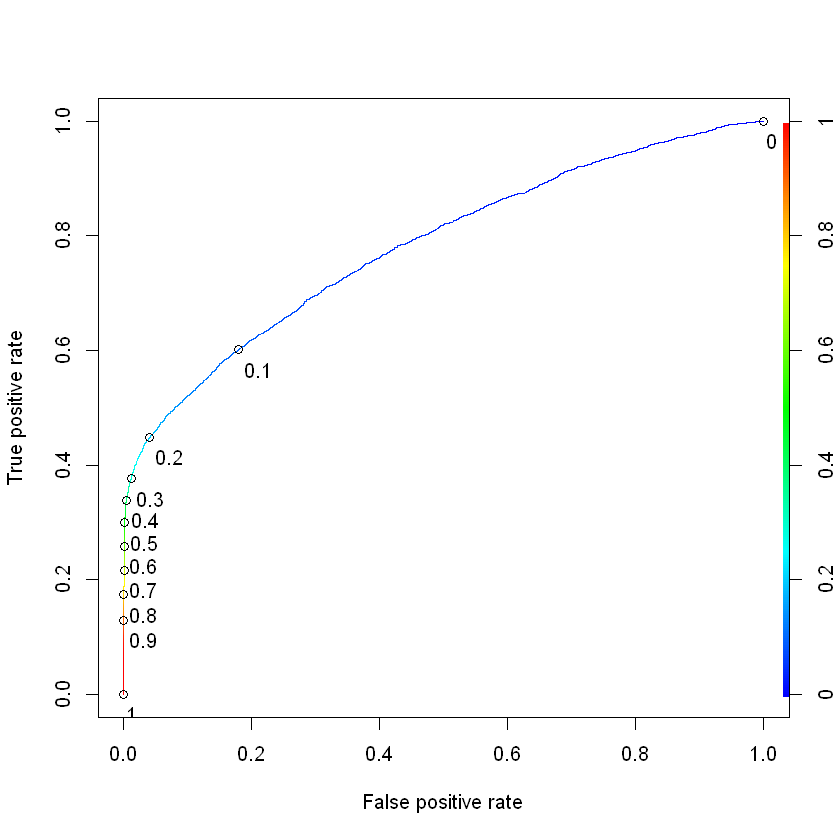

In [248]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,0.1), text.adj=c(-0.2,1.7))

In the following step, I make predictions on a testing set Test.

In [289]:
# Predicting the model using test data
Prob <-predict(model_logit_8,Test,type ="response")
prob1<- data.frame(Prob)
head(prob1)

,Prob
,<dbl>
5,0.007865792
6,0.053619130
10,0.281858286
21,0.141467887
25,0.076702000
26,0.311707131


In [291]:
# setting the cutoff for probability values
results <- ifelse(prob1 > 0.7,1,0)
head(results)

,Prob
5,0
6,0
10,0
21,0
25,0
26,0


<b>Predictive Value Validation</b>

In [251]:
#Display the confusion matrix or classification table
table(Test$is_promoted, results)

   results
        0     1
  0 11966     0
  1   883   231

In [252]:
#Calculating the error rate
misclasificationerror <- mean(results != Test$is_promoted)
misclasificationerror

[1] 0.06750765

In [253]:
# Calculating the accuracy rate
accuracyrate <- 1 - misclasificationerror
print(accuracyrate)

[1] 0.9324924


[1] 0.7801061

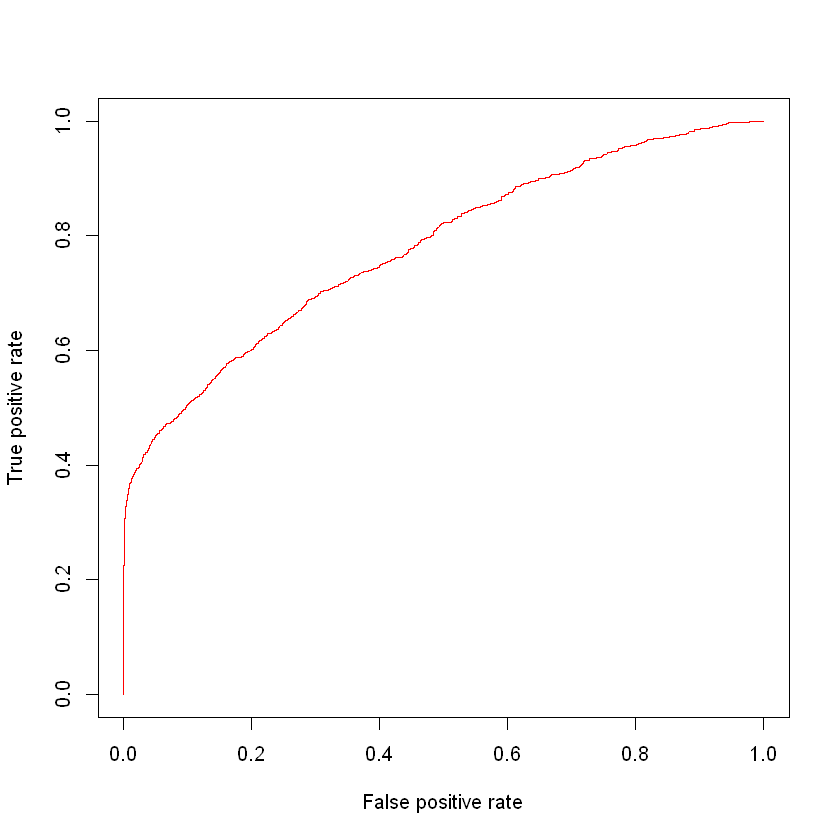

In [254]:
# Compute AUC for predicting Default with the model b
prob <-predict(model_logit_8,Test,type ="response")
pred <- prediction(prob, Test$is_promoted)
pmf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(pmf,col= "red" )
auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
auc

Around 76 % predictive accuracy rate - higher than 70% considered as the model with high predictive accuracy)

<b>Method 2: CART (Classification and Regression Trees)</b>

Usually, it is difficult to interpret the logistic regression and understand which factors are more critical due to the scales of the variables and the possibility of multicollinearity. That is why as a second method, I use CART. This method builds a tree by splitting the independent variables' values. To forecast the outcome for a new observation, I can follow the tree's splits at the end and predict the most frequent outcome in the training set that followed the same path. Also, the CART model does not assume a linear model as it does the logistic regression.

In [255]:
#load the library
library(rpart.plot)

Here, creating the CART model using the rpart function

In [256]:
#Classification Tree
Tree = rpart(formula = is_promoted ~ age + previous_year_rating +awards_won + 
                     avg_training_score + genderm + educationBelow_Secondary+education_Bachelor + educationMaster_above + 
                     departmentAnalytics+department_SM + departmentFinance + departmentHR + departmentLegal + 
                     departmentOperations + departmentOperations + departmentProcurement + department_RD + 
                     departmentTechnology + recruitment_channelother + recruitment_channelreferred + recruitment_channelsourcing,  data = Train, method = 'class')

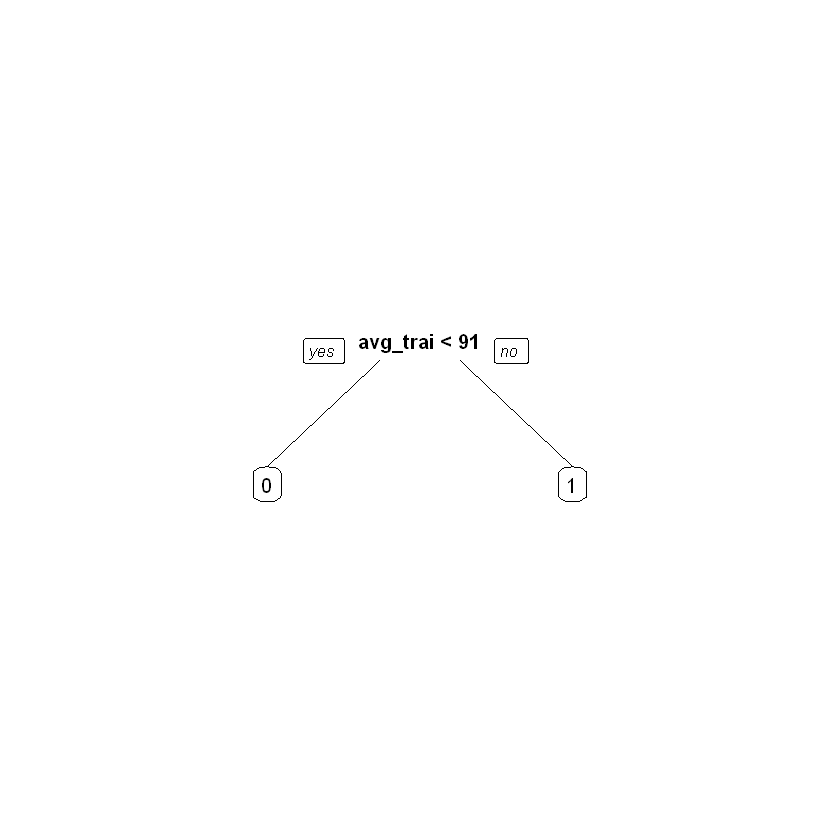

In [257]:
#Plot the tree
prp(Tree)

Here, the CART model is making predictions using the Test set.

In [258]:
#Predictions
PredictCART = predict(Tree, newdata = Test,type = 'class')

In [259]:
#Buiding a confusion matrix
table(Test$is_promoted, PredictCART)

   PredictCART
        0     1
  0 11950    16
  1   982   132

In [260]:
# Accuracy of CART model
(7709+76)/(7709+14+649+76)

[1] 0.9215199

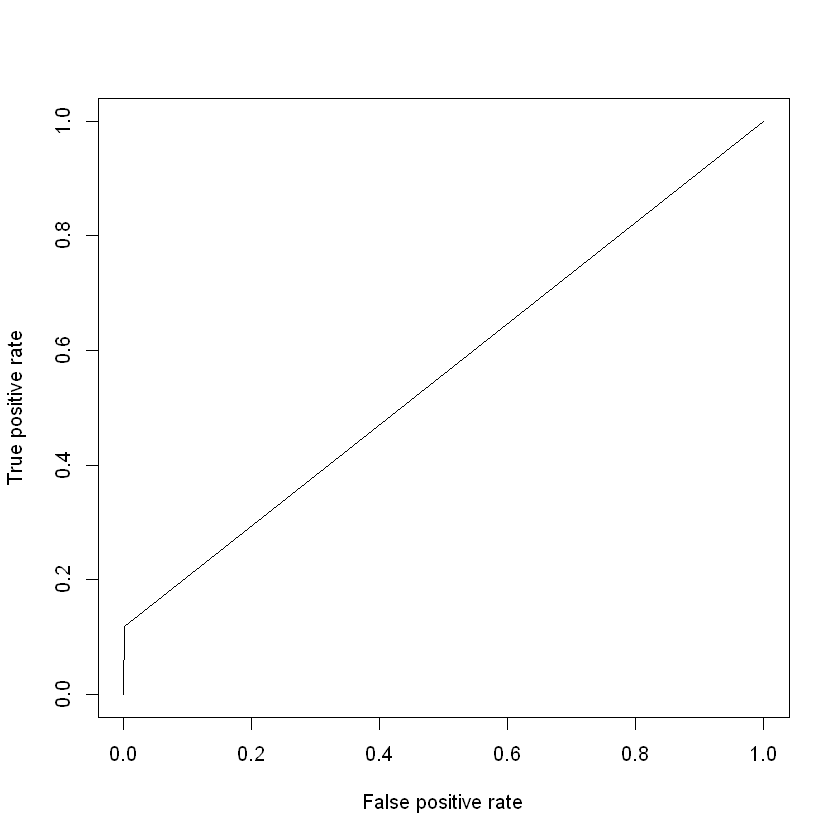

In [261]:
#Generate a ROC curve to evaluate the model
PredictROC = predict(Tree, newdata = Test)

pred = prediction(PredictROC[,2], Test$is_promoted)
perf = performance(pred, "tpr", "fpr")
plot(perf)

In [265]:
#Making the confusion matrix where I can see the test set values with the predicted values for the decision tree model
cm_dt <- table(PredictCART, Test$is_promoted)
cm_dt

           
PredictCART     0     1
          0 11950   982
          1    16   132

The model has accurately predicted 7709 observations, indicating that the model misclassified 649 of the values.

In [266]:
#Accuracy (around 96 %)
accuracy_dt = round((cm_dt[1,1] + cm_dt[1,1])/
  (cm_dt[1,1] + cm_dt[1,1] + cm_dt[2,1] + cm_dt[1,2]),2)
accuracy_dt

[1] 0.96

The CART model beats the logistic regression as it has a 96 % of prediction accuracy rate. In contrast, the logistic regression has 76 percent of predictive accuracy.

Area under the curve (AUC): 0.559

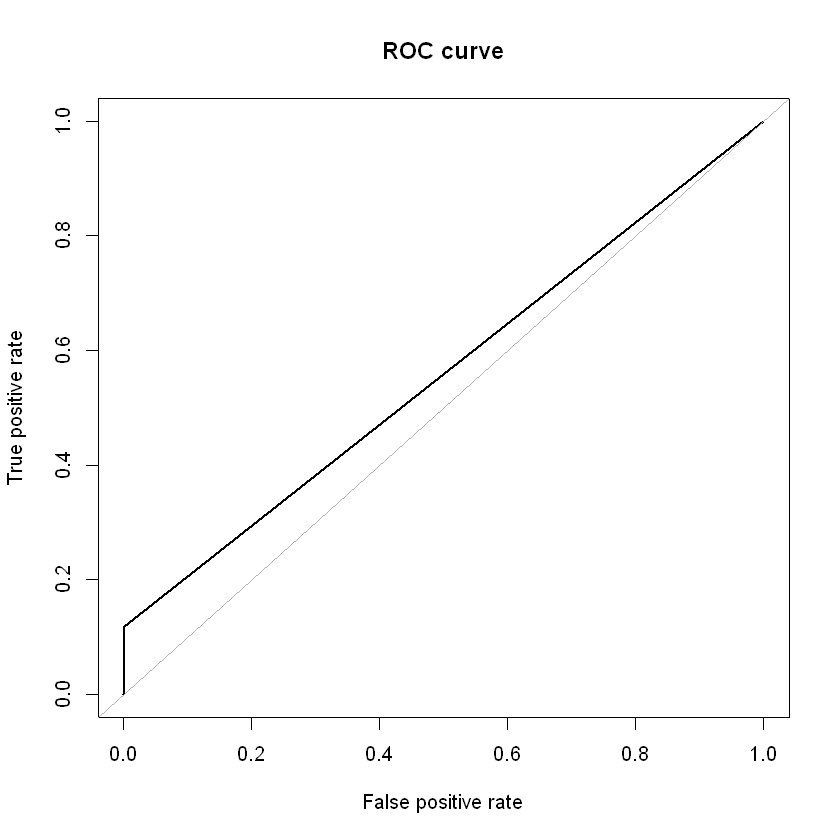

In [267]:
#ROC curve
roc.curve(Test$is_promoted, PredictCART)

<b>Random Forest</b>

This method is similar to CART. I use the technique because the Random Forest improves the accuracy of predictions. It builds a large number of trees. However, the Random Forest method is considered to be less interpretable than the CART. To predict a new observation, each tree in the forest votes on the outcome and picks the outcome that receives the majority of votes. For instance, if we run the CART multiple times, it would create the same tree every time.
In contrast, the Random Forest builds many different trees. The Random Forest allows trees to split on a random subset of the available independent variables. In other words, the data is used as a training set for each tree is selected randomly by replacement.

Create a random forest model with a training set and predict the values of the test set data.

In [268]:
rf = randomForest(formula = is_promoted ~ age + previous_year_rating +awards_won + 
                     avg_training_score + genderm + educationBelow_Secondary+education_Bachelor + educationMaster_above + 
                     departmentAnalytics+department_SM + departmentFinance + departmentHR + departmentLegal + 
                     departmentOperations + departmentOperations + departmentProcurement + department_RD + 
                     departmentTechnology + recruitment_channelother + recruitment_channelreferred + recruitment_channelsourcing,
                  data = Train, ntree=200, nodesize=25)


The randomForest function does not have a method argument; that is why I need to ensure that the outcome variable is a factor when doing a classification problem. Here, I convert the is_promoted variable in both training and testing sets into a factor variable.

In [269]:
# Convert outcome to factor
Train$is_promoted = as.factor(Train$is_promoted)
Test$is_promoted = as.factor(Test$is_promoted)

Here, I make predictions on Test set by using the random forest model rf.

In [270]:
# Make predictions
PredictForest = predict(rf, newdata = Test)

Below, I build a confusion matrix to compute the accuracy of predictions.

In [271]:
#Confusion matrix
table(Test$is_promoted, PredictForest)

   PredictForest
        0     1
  0 11960     6
  1   853   261

In [272]:
#Accuracy rate
round((7702+177)/(7702+21+548+177),2)

[1] 0.93

The predictive accuracy rate of the Random Forest model is 93 %. In this particular case, the Random Forest performed the same as the CART model as they both have a 93 % accuracy rate.

In [273]:
# Variable Importance
varImp(rf)

,Overall
,<dbl>
age,81.040870
previous_year_rating,157.830885
awards_won,149.482740
avg_training_score,891.893576
genderm,16.474848
educationBelow_Secondary,1.930083
education_Bachelor,8.253501
educationMaster_above,9.005288
departmentAnalytics,38.434930


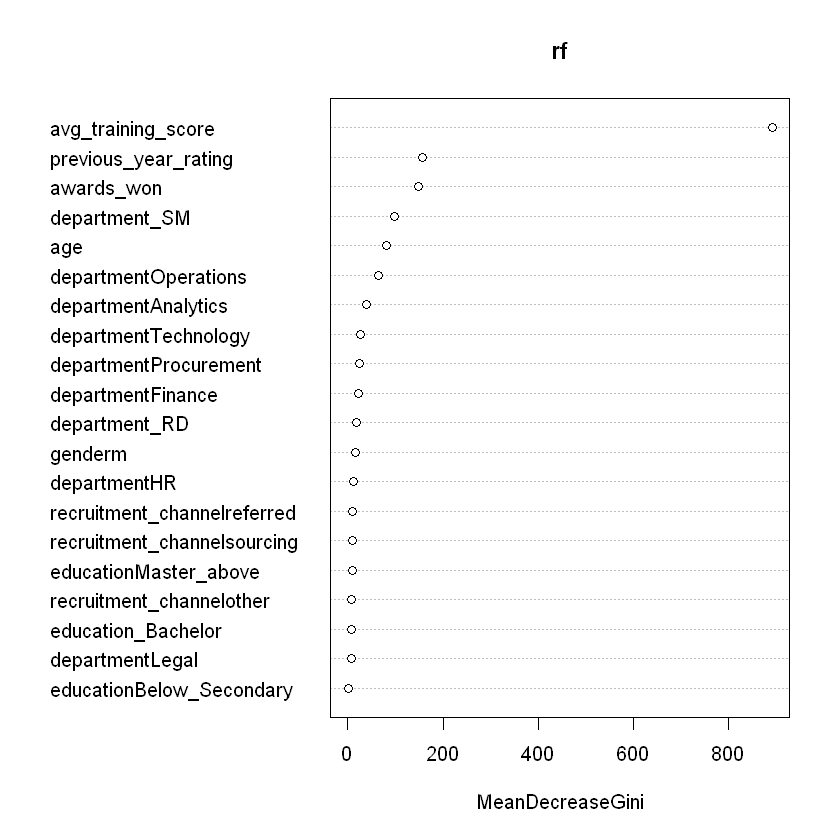

In [274]:
# Variable Importance Plot
varImpPlot(rf,type=2)


## Parsimonous Logit Model

In [278]:
# Logistic Regression Model
model_logit_8_reduced <- glm(formula = is_promoted ~ previous_year_rating +awards_won + 
                     avg_training_score,  data = Train, family = binomial(link = "logit"))


In [280]:
# Make predictions on training set
predictTrain = predict(model_logit_8_reduced, type="response")

In [281]:
# Analyze predictions
summary(predictTrain)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.006303 0.032025 0.062366 0.085496 0.108572 0.837889 

In [282]:
#see whether we are predicting higher probabilities for the actual promotion cases as we expect. Higher prediction prob for no promotion
tapply(predictTrain, Train$is_promoted, mean)

0          1 
0.07673475 0.17921266

In [287]:
# Confusion matrix for threshold of 0.5
cm_dt <- table(Train$is_promoted, predictTrain > 0.5)
cm_dt

   
    FALSE  TRUE
  0 34303    86
  1  2993   222

In [288]:
accuracy_dt = round((cm_dt[1,1] + cm_dt[1,1])/
  (cm_dt[1,1] + cm_dt[1,1] + cm_dt[2,1] + cm_dt[1,2]),2)
accuracy_dt

[1] 0.96

In [285]:
# Confusion matrix for threshold of 0.7
cm_dt <- table(Train$is_promoted, predictTrain > 0.7)
cm_dt

   
    FALSE  TRUE
  0 34375    14
  1  3096   119

In [286]:
accuracy_dt = round((cm_dt[1,1] + cm_dt[1,1])/
  (cm_dt[1,1] + cm_dt[1,1] + cm_dt[2,1] + cm_dt[1,2]),2)
accuracy_dt

[1] 0.96

<b> Cross Validation </b>

I will do cross-validation on my CART model, but not on the random forest model. Suppose we believe the random forest algorithm creators. In that case, the model is not sensitive to the parameters. That is why it does not easily overfit the training set.

The idea of cross-validation is to build many models. We basically set the number of folds, in other words split the the training set into equal subsets. By doing so, cross-validation builds one model for each fold, this is how we can compute the accuarcy of the model. Moreover, we can use each folds as a validation sets. This allows us to take the averages over the folds to set the final parameter value that we want to use. If the fold parameter is low, it means overfitting to the training set. At the same time, if the parameter is too large, it implies that the model is too simple.

In the last part of my analysis, I install the necessary packages and libraries for trying out the cross-validation for my CART model. As a first step, I need to define the cross-validation experiment. For doing so, I define the number of needed folds with the help of trainControl function. Then, I pick the possible values fir my cp parameter by using the expand.grid functions. I start the cross-validation process by exploiting the train function with the Train dataset. This step gives me a table of cross-validation accuracy for different cp parameters. The first column gives the cp parameter that was tested, and the second column gives the cross-validation accuarcy for cp value. The last cp value in the model is 0.18. This is what I will need to create a CART model. First, I build the classification tree with the training dataset. Then, I make predictions on the testing dataset by using this model. Lastly, I create a confusion matrix, which allows me to compute the accuracy rate prediction.

In [275]:
# Install cross-validation packages
library(caret)
library(e1071)

# Define cross-validation experiment
numFolds = trainControl( method = "cv", number = 10 )
# poddible for our cp parameter
cpGrid = expand.grid( .cp = seq(0.01,0.5,0.01)) # this will define the cp parameters to test as numbers from 0.01 to 0.5, in increments of 0.01

# Perform the cross validation
train(is_promoted ~ age + previous_year_rating +awards_won + 
                     avg_training_score + genderm + educationBelow_Secondary+education_Bachelor + educationMaster_above + 
                     departmentAnalytics+department_SM + departmentFinance + departmentHR + departmentLegal + 
                     departmentOperations + departmentOperations + departmentProcurement + department_RD + 
                     departmentTechnology + recruitment_channelother + recruitment_channelreferred + recruitment_channelsourcing, data = Train, method = "rpart", trControl = numFolds, tuneGrid = cpGrid )

CART 

37604 samples
   20 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 33843, 33844, 33843, 33844, 33843, 33844, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa     
  0.01  0.9239176  0.19794114
  0.02  0.9215244  0.17714630
  0.03  0.9215244  0.17714630
  0.04  0.9215244  0.17714630
  0.05  0.9215244  0.17714630
  0.06  0.9215244  0.17714630
  0.07  0.9215244  0.17714630
  0.08  0.9215244  0.17714630
  0.09  0.9163388  0.04929464
  0.10  0.9145038  0.00000000
  0.11  0.9145038  0.00000000
  0.12  0.9145038  0.00000000
  0.13  0.9145038  0.00000000
  0.14  0.9145038  0.00000000
  0.15  0.9145038  0.00000000
  0.16  0.9145038  0.00000000
  0.17  0.9145038  0.00000000
  0.18  0.9145038  0.00000000
  0.19  0.9145038  0.00000000
  0.20  0.9145038  0.00000000
  0.21  0.9145038  0.00000000
  0.22  0.9145038  0.00000000
  0.23  0.9145038  0.00000000
  0.24  0.9145038  0.00000000
  0.25  0.91

In [276]:
# Create a new CART model
TreeCV = rpart(is_promoted ~ age + previous_year_rating +awards_won + 
                     avg_training_score + genderm + educationBelow_Secondary+education_Bachelor + educationMaster_above + 
                     departmentAnalytics+department_SM + departmentFinance + departmentHR + departmentLegal + 
                     departmentOperations + departmentOperations + departmentProcurement + department_RD + 
                     departmentTechnology + recruitment_channelother + recruitment_channelreferred + recruitment_channelsourcing,  
               data = Train, method="class", cp = 0.01)

# Make predictions
PredictCV = predict(TreeCV, newdata = Test, type = "class")

cm_dt <- table(Test$is_promoted, PredictCV)
cm_dt

   PredictCV
        0     1
  0 11950    16
  1   982   132

In [277]:
accuracy_dt = round((cm_dt[1,1] + cm_dt[1,1])/
  (cm_dt[1,1] + cm_dt[1,1] + cm_dt[2,1] + cm_dt[1,2]),2)
accuracy_dt

[1] 0.96

# Conclusion

# References